In [70]:
import pandas as pd
train_file = 'blp25_hatespeech_subtask_1C_train.tsv'
validation_file = 'blp25_hatespeech_subtask_1C_dev.tsv'
validation_file2 = 'blp25_hatespeech_subtask_1C_dev_test_with_labels.tsv'

test_file = 'blp25_hatespeech_subtask_1C_test_with_labels.tsv'


In [71]:
#tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
# Load train/val/test DataFrames
train_df = pd.read_csv(train_file, sep="\t")
dev_df1 = pd.read_csv(validation_file , sep="\t")
dev_df2 = pd.read_csv(validation_file2 , sep="\t")
test_df = pd.read_csv(test_file, sep="\t")



# Concatenate them into one dataframe
train_df = pd.concat([train_df, dev_df1, dev_df2], ignore_index=True)
dev_df =test_df

In [3]:
train_df['hate_severity'].unique()

array(['Little to None', 'Severe', 'Mild'], dtype=object)

In [182]:
train_df

,id,text,hate_type,hate_severity,to_whom
0,147963,ধন্যবাদ বর্ডার গার্ড দেরকে এভাবে পাহারা দিতে হ...,NaN,Little to None,NaN
1,214275,ছোটবেলায় অনেক কষ্ট করে কিছু গালাগালি শিখছিলাম...,NaN,Little to None,NaN
2,849172,অতিরিক্ত এ নিজেকে বাদুর বানাইয়া ফেলছেন রে,Abusive,Little to None,Individual
3,821985,চিন ভারত রাশিয়া এই তিন দেশ এক থাকলে বিশ্বকে শা...,NaN,Little to None,NaN
4,477288,এটার বিচার কে করবেযে বিচার করবে সেই তো হলো এই ...,Abusive,Severe,Individual
...,...,...,...,...,...
40541,776466,সত্য কথা তেতু লাগে,NaN,Little to None,NaN
40542,849227,এই ফকিননি মাগীটা আর কত নাটক দেখাবে,Abusive,Mild,Individual
40543,532697,দেখো আজকে কার ফিটনেস কোথায় দাঁড়িয়েছে তুমি চ...,Profane,Severe,Individual
40544,861411,ছোট ভাইটির পাসে থাকুন গেম ভিড়িও বানাই,NaN,Little to None,NaN


In [183]:
l2id = {'Little to None': 0, 'Severe': 1, 'Mild': 2}
id2l = {v: k for k, v in l2id.items()}


# def clean_label(x):
#     # handle missing or NaN → "None"
#     if pd.isna(x) or x == 'None':
#         return 'None'
#     # already list-like e.g. ['Abusive']
#     if isinstance(x, list):
#         return x[0] if len(x) > 0 else 'None'
#     # string cases like "[]" or "[Abusive]" or "[Political Hate]"
#     x = x.strip("[]").strip()
#     if x == "":
#         return 'None'
#     return x


def process_df(df):
    # Ensure labels are proper lists
    #df["label"] = df["label"].apply(clean_label)
    #df["label"] = df["label"].fillna("None")
    # Now create binary label
    #df["toxic"] = df["label"].apply(lambda x: 0 if x == "None" else 1)
    df["label_id"] = df["hate_severity"].map(l2id)

    

  

    return df

train_df = process_df(train_df)
dev_df  = process_df(dev_df)

train_df

,id,text,hate_type,hate_severity,to_whom,label_id
0,147963,ধন্যবাদ বর্ডার গার্ড দেরকে এভাবে পাহারা দিতে হ...,NaN,Little to None,NaN,0
1,214275,ছোটবেলায় অনেক কষ্ট করে কিছু গালাগালি শিখছিলাম...,NaN,Little to None,NaN,0
2,849172,অতিরিক্ত এ নিজেকে বাদুর বানাইয়া ফেলছেন রে,Abusive,Little to None,Individual,0
3,821985,চিন ভারত রাশিয়া এই তিন দেশ এক থাকলে বিশ্বকে শা...,NaN,Little to None,NaN,0
4,477288,এটার বিচার কে করবেযে বিচার করবে সেই তো হলো এই ...,Abusive,Severe,Individual,1
...,...,...,...,...,...,...
40541,776466,সত্য কথা তেতু লাগে,NaN,Little to None,NaN,0
40542,849227,এই ফকিননি মাগীটা আর কত নাটক দেখাবে,Abusive,Mild,Individual,2
40543,532697,দেখো আজকে কার ফিটনেস কোথায় দাঁড়িয়েছে তুমি চ...,Profane,Severe,Individual,1
40544,861411,ছোট ভাইটির পাসে থাকুন গেম ভিড়িও বানাই,NaN,Little to None,NaN,0


In [184]:
test_df

,id,text,hate_type,hate_severity,to_whom,label_id
0,12764,ইজরায়েলের বিচার হওয়া উচিৎ,Abusive,Mild,Society,2
1,202933,শামীম ওসামা বিন হাসিনা,NaN,Little to None,NaN,0
2,165894,হেন কাপ পুলিশের মারে অন্যরা তাহলে পলিশের কি হব...,NaN,Little to None,NaN,0
3,124999,আল্লাহ্ এসব জানোয়ারদের শেষ করে দাও,Profane,Severe,Community,1
4,535301,ইহুদির বাচ্চা ইহুদী ই হবে,Religious Hate,Mild,Community,2
...,...,...,...,...,...,...
10195,908819,শালা জঙ্গি নিচু জাত বাংলাদেশের শালা নিজের দেশ ...,Profane,Mild,Individual,2
10196,597085,এরে হেতি হাগল অই গেছে হেতিরে পাবনা নে,Abusive,Mild,Individual,2
10197,901448,এখান থেকে প্রমান হলো বাংলার মীর জাফর চাইলেই তা...,NaN,Little to None,NaN,0
10198,617821,শুনি যে এই দেশের সংবিধান গণতান্ত্রিক সংবিধান ক...,NaN,Little to None,NaN,0


In [185]:

dev_df = dev_df.fillna("none")
train_df = train_df.fillna("none")
test_df = test_df.fillna("none")
test_df

,id,text,hate_type,hate_severity,to_whom,label_id
0,12764,ইজরায়েলের বিচার হওয়া উচিৎ,Abusive,Mild,Society,2
1,202933,শামীম ওসামা বিন হাসিনা,none,Little to None,none,0
2,165894,হেন কাপ পুলিশের মারে অন্যরা তাহলে পলিশের কি হব...,none,Little to None,none,0
3,124999,আল্লাহ্ এসব জানোয়ারদের শেষ করে দাও,Profane,Severe,Community,1
4,535301,ইহুদির বাচ্চা ইহুদী ই হবে,Religious Hate,Mild,Community,2
...,...,...,...,...,...,...
10195,908819,শালা জঙ্গি নিচু জাত বাংলাদেশের শালা নিজের দেশ ...,Profane,Mild,Individual,2
10196,597085,এরে হেতি হাগল অই গেছে হেতিরে পাবনা নে,Abusive,Mild,Individual,2
10197,901448,এখান থেকে প্রমান হলো বাংলার মীর জাফর চাইলেই তা...,none,Little to None,none,0
10198,617821,শুনি যে এই দেশের সংবিধান গণতান্ত্রিক সংবিধান ক...,none,Little to None,none,0


In [186]:

x =test_df['hate_severity'].value_counts()
x

hate_severity
Little to None    6737
Mild              2001
Severe            1462
Name: count, dtype: int64

In [187]:
x =train_df['hate_severity'].value_counts()
x

hate_severity
Little to None    26906
Mild               7762
Severe             5878
Name: count, dtype: int64

In [188]:
x =dev_df['hate_severity'].value_counts()
x

hate_severity
Little to None    6737
Mild              2001
Severe            1462
Name: count, dtype: int64

In [189]:

# # Display the result
# print(train_df[['text', 'toxic']].head())

In [190]:
df_train = train_df

df_val = dev_df

df_val

,id,text,hate_type,hate_severity,to_whom,label_id
0,12764,ইজরায়েলের বিচার হওয়া উচিৎ,Abusive,Mild,Society,2
1,202933,শামীম ওসামা বিন হাসিনা,none,Little to None,none,0
2,165894,হেন কাপ পুলিশের মারে অন্যরা তাহলে পলিশের কি হব...,none,Little to None,none,0
3,124999,আল্লাহ্ এসব জানোয়ারদের শেষ করে দাও,Profane,Severe,Community,1
4,535301,ইহুদির বাচ্চা ইহুদী ই হবে,Religious Hate,Mild,Community,2
...,...,...,...,...,...,...
10195,908819,শালা জঙ্গি নিচু জাত বাংলাদেশের শালা নিজের দেশ ...,Profane,Mild,Individual,2
10196,597085,এরে হেতি হাগল অই গেছে হেতিরে পাবনা নে,Abusive,Mild,Individual,2
10197,901448,এখান থেকে প্রমান হলো বাংলার মীর জাফর চাইলেই তা...,none,Little to None,none,0
10198,617821,শুনি যে এই দেশের সংবিধান গণতান্ত্রিক সংবিধান ক...,none,Little to None,none,0


In [191]:
# import pandas as pd

# # existing train and dev
# df_train = train_df.copy()
# df_val   = dev_df.copy()

# # split dev_df in half
# half = len(df_val) // 2
# dev_train = df_val.iloc[:half].reset_index(drop=True)
# dev_val   = df_val.iloc[half:].reset_index(drop=True)

# # add first half of dev to training set
# df_train = pd.concat([df_train, dev_train], ignore_index=True)

# # final validation set is the second half
# df_val = dev_val

# print("Train size:", len(df_train))
# print("Validation size:", len(df_val))



import pandas as pd

# existing train and dev
df_train = train_df.copy()
df_val   = dev_df.copy()

# --- 75/25 split of dev_df ---
n   = len(df_val)
cut = int(0.75 * n)  # floor to an integer

# (optional) shuffle to avoid order bias:
# df_val = df_val.sample(frac=1, random_state=42).reset_index(drop=True)

dev_train = df_val.iloc[:cut].reset_index(drop=True)  # 75%
dev_val   = df_val.iloc[cut:].reset_index(drop=True)  # 25%

# add 75% of dev to training set
df_train = pd.concat([df_train, dev_train], ignore_index=True)

# final validation set is the remaining 25%
df_val = dev_val

print("Train size:", len(df_train))
print("Validation size:", len(df_val))


Train size: 48196
Validation size: 2550


In [192]:
toxic_df = df_train
target_list = sorted(toxic_df['hate_severity'].unique().tolist()) # Sort for consistent column order
print(f"Target Categories: {target_list}")

Target Categories: ['Little to None', 'Mild', 'Severe']


In [193]:
df_train = pd.get_dummies(df_train, columns=['hate_severity'], prefix='', prefix_sep='')[['text'] + target_list]

df_val = pd.get_dummies(df_val, columns=['hate_severity'], prefix='', prefix_sep='')[['text'] + target_list]

df_val

,text,Little to None,Mild,Severe
0,সময় না কাটলে পাঁচ ওয়াক্ত নামাজ আদায় করেন দে...,True,False,False
1,কাদের সাহেব এদের কে তেল বাজির উপজুক্ত ভাবে জুত...,True,False,False
2,বাংলাদেশ থেকে নেপাল বাংলাদেশ থেকে ভূটান এই ট্র...,True,False,False
3,কাজ ছাড়া খেতে পারলে আসবেই ত,True,False,False
4,ভাই এটা কোন নির্বাচন না আপনারা জনগণের ভাসাবুজু...,True,False,False
...,...,...,...,...
2545,শালা জঙ্গি নিচু জাত বাংলাদেশের শালা নিজের দেশ ...,False,True,False
2546,এরে হেতি হাগল অই গেছে হেতিরে পাবনা নে,False,True,False
2547,এখান থেকে প্রমান হলো বাংলার মীর জাফর চাইলেই তা...,True,False,False
2548,শুনি যে এই দেশের সংবিধান গণতান্ত্রিক সংবিধান ক...,True,False,False


In [194]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoConfig, AutoModel
from collections import defaultdict
from tqdm import tqdm as tq
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoConfig, AutoModel
from torch.optim import AdamW  # <-- use this instead


MODEL_NAME ="csebuetnlp/banglabert"

# You can keep these as they are or tune them
MAX_LEN = 256
TRAIN_BATCH_SIZE = 16
VAL_BATCH_SIZE = 16
EPOCHS = 3
LEARNING_RATE = 2e-5

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [195]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from collections import defaultdict
from tqdm import tqdm as tq
from sklearn.model_selection import train_test_split

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, df, tokenizer, max_len, target_list):
        self.tokenizer = tokenizer
        self.df = df
        # Corrected column name from 'title' or 'Text' to 'text'
        self.texts = list(df['text']) 
        self.targets = self.df[target_list].values
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = str(self.texts[index])
        text = " ".join(text.split())
        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'token_type_ids': inputs["token_type_ids"].flatten(),
            'targets': torch.FloatTensor(self.targets[index]),
            'text': text
        }

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
train_dataset = CustomDataset(df_train, tokenizer, MAX_LEN, target_list)
val_dataset = CustomDataset(df_val, tokenizer, MAX_LEN, target_list)

train_data_loader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
val_data_loader = DataLoader(val_dataset, batch_size=VAL_BATCH_SIZE, shuffle=False)


In [196]:
class BERTClass(torch.nn.Module):
    def __init__(self, model_name, target_list):
        super(BERTClass, self).__init__()
        self.bert_model = AutoModel.from_pretrained(model_name, return_dict=True)
        self.dropout = torch.nn.Dropout(0.3)
        self.linear = torch.nn.Linear(self.bert_model.config.hidden_size, len(target_list))
    
    def forward(self, input_ids, attn_mask, token_type_ids):
        output = self.bert_model(
            input_ids, 
            attention_mask=attn_mask, 
            token_type_ids=token_type_ids
        )
        
        # --- FIX IS HERE ---
        # Instead of pooler_output, we take the last hidden state of the [CLS] token
        # output.last_hidden_state has shape (batch_size, sequence_length, hidden_size)
        # We select the [CLS] token by indexing with [:, 0, :]
        cls_output = output.last_hidden_state[:, 0, :]
        
        output_dropout = self.dropout(cls_output)
        final_output = self.linear(output_dropout)
        
        return final_output

# Instantiate the model
model = BERTClass(MODEL_NAME, target_list)
model.to(device)

# ==================================
# 4. Loss Function and Optimizer
# ==================================
# For multi-label classification, BCEWithLogitsLoss is the correct choice.
# It combines a Sigmoid layer and the BCELoss in one single class.
def loss_fn(outputs, targets):
    return nn.BCEWithLogitsLoss()(outputs, targets)

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

# ==================================
# 5. Training and Evaluation Functions
# ==================================
# Your train_model and eval_model functions are well-written and can be used as they are.
# I've just adjusted the tqdm progress bar description for more clarity.

def train_model(training_loader, model, optimizer):
    model.train()
    losses = []
    correct_predictions = 0
    num_samples = 0
    
    loop = tq(training_loader, leave=True)
    for batch_idx, data in enumerate(loop):
        ids = data['input_ids'].to(device, dtype=torch.long)
        mask = data['attention_mask'].to(device, dtype=torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
        targets = data['targets'].to(device, dtype=torch.float)

        outputs = model(ids, mask, token_type_ids)
        loss = loss_fn(outputs, targets)
        losses.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accuracy calculation
        outputs_sigmoid = torch.sigmoid(outputs).cpu().detach().numpy().round()
        targets_np = targets.cpu().detach().numpy()
        correct_predictions += np.sum(outputs_sigmoid == targets_np)
        num_samples += targets_np.size
        
        loop.set_description(f"Train - Loss: {loss.item():.4f}")

    return model, float(correct_predictions) / num_samples, np.mean(losses)


def eval_model(validation_loader, model):
    model.eval()
    losses = []
    correct_predictions = 0
    num_samples = 0
    
    with torch.no_grad():
        for data in validation_loader:
            ids = data['input_ids'].to(device, dtype=torch.long)
            mask = data['attention_mask'].to(device, dtype=torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype=torch.float)
            
            outputs = model(ids, mask, token_type_ids)
            loss = loss_fn(outputs, targets)
            losses.append(loss.item())

            outputs_sigmoid = torch.sigmoid(outputs).cpu().detach().numpy().round()
            targets_np = targets.cpu().detach().numpy()
            correct_predictions += np.sum(outputs_sigmoid == targets_np)
            num_samples += targets_np.size

    return float(correct_predictions) / num_samples, np.mean(losses)


# ==================================
# 6. Training Loop
# ==================================
history = defaultdict(list)
best_accuracy = 0

for epoch in range(1, EPOCHS + 1):
    print(f'\n--- Epoch {epoch}/{EPOCHS} ---')
    
    model, train_acc, train_loss = train_model(train_data_loader, model, optimizer)
    val_acc, val_loss = eval_model(val_data_loader, model)

    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
    print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    if val_acc > best_accuracy:
        torch.save(model.state_dict(), "Task2_all_label_best_model_state.bin")
        best_accuracy = val_acc


--- Epoch 1/3 ---


Train - Loss: 0.6133: 100%|██████████| 3013/3013 [11:22<00:00,  4.41it/s]


Train Loss: 0.3830, Train Acc: 0.8282
Val Loss: 0.3776, Val Acc: 0.8238

--- Epoch 2/3 ---


Train - Loss: 0.5659: 100%|██████████| 3013/3013 [11:23<00:00,  4.41it/s]


Train Loss: 0.3277, Train Acc: 0.8498
Val Loss: 0.3938, Val Acc: 0.8212

--- Epoch 3/3 ---


Train - Loss: 0.7042: 100%|██████████| 3013/3013 [11:23<00:00,  4.41it/s]


Train Loss: 0.2728, Train Acc: 0.8767
Val Loss: 0.4493, Val Acc: 0.8031


In [197]:

print("\n--- Evaluating Pipeline on Test Set ---")

model.load_state_dict(torch.load("Task2_all_label_best_model_state.bin"))



model.eval()




--- Evaluating Pipeline on Test Set ---


BERTClass(
  (bert_model): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps

In [198]:
import numpy as np
import torch
from tqdm.notebook import  tqdm

def predict_toxicity_pipeline(text, tokenizer, model_2, device, max_len, target_list):
    # --- Tokenization (no changes here) ---
    inputs = tokenizer.encode_plus(
        text, add_special_tokens=True, max_length=max_len, padding='max_length',
        return_token_type_ids=True, truncation=True, return_attention_mask=True, return_tensors='pt'
    )
    ids = inputs['input_ids'].to(device)
    mask = inputs['attention_mask'].to(device)
    
    # Check if 'token_type_ids' exists in the tokenizer output
    token_ids = inputs['token_type_ids'].to(device) if 'token_type_ids' in inputs else None

    with torch.no_grad():
       
        output_2 =  model_2(ids, mask, token_ids)
            
            # --- 👇 KEY CHANGE IS HERE ---
            # 1. Find the index of the label with the highest score (logit)
            # We use argmax directly on the logits, which is efficient.
            # --- AFTER ---
        pred_index = torch.argmax(output_2, dim=1).item()
            
            # 2. Create a one-hot encoded vector
            # This creates an array of zeros...
        one_hot_prediction = np.zeros(len(target_list), dtype=int)
            # ...and sets the predicted index to 1.
        one_hot_prediction[pred_index] = 1
            
        return one_hot_prediction

# --- Your evaluation loop (assuming target_list is defined) ---
# Example: target_list = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

all_predictions = []
# Ensure test_df, tokenizer, model_1, etc. are correctly defined and loaded
for text in tq(test_df['text'], desc="Predicting on test data"):
    prediction = predict_toxicity_pipeline(text, tokenizer, model, device, MAX_LEN, target_list)
    all_predictions.append(prediction)

y_pred = np.array(all_predictions)

# Now y_pred will be a 2D array where each row has at most one '1'. 

Predicting on test data: 100%|██████████| 10200/10200 [01:56<00:00, 87.25it/s]


In [199]:
y_pred

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [200]:
import numpy as np
import pandas as pd


#'Abusive', 'None', 'Political Hate', 'Profane', 'Religious Hate', 'Sexism'
# #'Abusive', 'Political Hate', 'Profane', 'Religious Hate', 'Sexism']
# 'Community', 'Individual', 'None', 'Organization', 'Society'
# ['Community', 'Individual', 'None', 'Organization', 'Society']
# Your mapping

#'Little to None', 'Severe', 'Mild'
id2l = {
    0: 'Little to None',
    1: 'Mild',
    2: 'Severe',

   
}

# Example y_pred
# y_pred = np.array([[0,0,0,0,0],[0,0,0,1,0],[1,0,0,0,0]])

def decode_labels(row):
    indices = np.where(row == 1)[0]
    if len(indices) == 0:
        return "None"
    # If multiple labels, join them with comma
    return ", ".join([id2l[i] for i in indices])

# Convert predictions into a DataFrame column
df = pd.DataFrame()
df["Predicted_Label"] = [decode_labels(row) for row in y_pred]

print(df.head())


  Predicted_Label
0  Little to None
1  Little to None
2  Little to None
3          Severe
4            Mild


In [313]:
test_df['label']=df['Predicted_Label']
test_df['model']='Bangla-Bert'
test_df

,id,text,hate_type,hate_severity,to_whom,label,model
0,12764,ইজরায়েলের বিচার হওয়া উচিৎ,Abusive,Mild,Society,Little to None,Bangla-Bert
1,202933,শামীম ওসামা বিন হাসিনা,NaN,Little to None,NaN,Little to None,Bangla-Bert
2,165894,হেন কাপ পুলিশের মারে অন্যরা তাহলে পলিশের কি হব...,NaN,Little to None,NaN,Little to None,Bangla-Bert
3,124999,আল্লাহ্ এসব জানোয়ারদের শেষ করে দাও,Profane,Severe,Community,Severe,Bangla-Bert
4,535301,ইহুদির বাচ্চা ইহুদী ই হবে,Religious Hate,Mild,Community,Mild,Bangla-Bert
...,...,...,...,...,...,...,...
10195,908819,শালা জঙ্গি নিচু জাত বাংলাদেশের শালা নিজের দেশ ...,Profane,Mild,Individual,Severe,Bangla-Bert
10196,597085,এরে হেতি হাগল অই গেছে হেতিরে পাবনা নে,Abusive,Mild,Individual,Severe,Bangla-Bert
10197,901448,এখান থেকে প্রমান হলো বাংলার মীর জাফর চাইলেই তা...,NaN,Little to None,NaN,Little to None,Bangla-Bert
10198,617821,শুনি যে এই দেশের সংবিধান গণতান্ত্রিক সংবিধান ক...,NaN,Little to None,NaN,Little to None,Bangla-Bert


In [314]:
test_df = test_df[['id','text','label', 'model']]
test_df

,id,text,label,model
0,12764,ইজরায়েলের বিচার হওয়া উচিৎ,Little to None,Bangla-Bert
1,202933,শামীম ওসামা বিন হাসিনা,Little to None,Bangla-Bert
2,165894,হেন কাপ পুলিশের মারে অন্যরা তাহলে পলিশের কি হব...,Little to None,Bangla-Bert
3,124999,আল্লাহ্ এসব জানোয়ারদের শেষ করে দাও,Severe,Bangla-Bert
4,535301,ইহুদির বাচ্চা ইহুদী ই হবে,Mild,Bangla-Bert
...,...,...,...,...
10195,908819,শালা জঙ্গি নিচু জাত বাংলাদেশের শালা নিজের দেশ ...,Severe,Bangla-Bert
10196,597085,এরে হেতি হাগল অই গেছে হেতিরে পাবনা নে,Severe,Bangla-Bert
10197,901448,এখান থেকে প্রমান হলো বাংলার মীর জাফর চাইলেই তা...,Little to None,Bangla-Bert
10198,617821,শুনি যে এই দেশের সংবিধান গণতান্ত্রিক সংবিধান ক...,Little to None,Bangla-Bert


In [52]:
test_df.to_csv("V4_subtask_3A.tsv", sep="\t", index=False)
print("Saved to final_ensemble.tsv")

Saved to final_ensemble.tsv


In [53]:
test_df

,id,text,hate_type,hate_severity,to_whom
0,12764,ইজরায়েলের বিচার হওয়া উচিৎ,Abusive,Mild,Society
1,202933,শামীম ওসামা বিন হাসিনা,NaN,Little to None,NaN
2,165894,হেন কাপ পুলিশের মারে অন্যরা তাহলে পলিশের কি হব...,NaN,Little to None,NaN
3,124999,আল্লাহ্ এসব জানোয়ারদের শেষ করে দাও,Profane,Severe,Community
4,535301,ইহুদির বাচ্চা ইহুদী ই হবে,Religious Hate,Mild,Community
...,...,...,...,...,...
10195,908819,শালা জঙ্গি নিচু জাত বাংলাদেশের শালা নিজের দেশ ...,Profane,Mild,Individual
10196,597085,এরে হেতি হাগল অই গেছে হেতিরে পাবনা নে,Abusive,Mild,Individual
10197,901448,এখান থেকে প্রমান হলো বাংলার মীর জাফর চাইলেই তা...,NaN,Little to None,NaN
10198,617821,শুনি যে এই দেশের সংবিধান গণতান্ত্রিক সংবিধান ক...,NaN,Little to None,NaN


In [54]:
test_df2=pd.read_csv('finalllllll_task1.tsv', sep="\t")
test_df2

,id,label,model
0,12764,Abusive,bangla-bert
1,202933,NaN,bangla-bert
2,165894,NaN,bangla-bert
3,124999,Profane,bangla-bert
4,535301,Religious Hate,bangla-bert
...,...,...,...
10195,908819,Profane,bangla-bert
10196,597085,Abusive,bangla-bert
10197,901448,Abusive,bangla-bert
10198,617821,NaN,bangla-bert


In [55]:
test_df3=pd.read_csv('V6_subtask_2A.tsv', sep="\t")
test_df3

,id,label,model
0,12764,Society,TACTBanglaBERT
1,202933,NaN,TACTBanglaBERT
2,165894,NaN,TACTBanglaBERT
3,124999,Community,TACTBanglaBERT
4,535301,Individual,TACTBanglaBERT
...,...,...,...
10195,908819,Society,TACTBanglaBERT
10196,597085,Individual,TACTBanglaBERT
10197,901448,Individual,TACTBanglaBERT
10198,617821,NaN,TACTBanglaBERT


In [56]:
test_df.rename(columns={"label": "hate_severity"}, inplace=True)

In [57]:

# or in-place
test_df2.rename(columns={"label": "hate_type"}, inplace=True)
test_df2

,id,hate_type,model
0,12764,Abusive,bangla-bert
1,202933,NaN,bangla-bert
2,165894,NaN,bangla-bert
3,124999,Profane,bangla-bert
4,535301,Religious Hate,bangla-bert
...,...,...,...
10195,908819,Profane,bangla-bert
10196,597085,Abusive,bangla-bert
10197,901448,Abusive,bangla-bert
10198,617821,NaN,bangla-bert


In [58]:

# or in-place
test_df['hate_type']=test_df2['hate_type']
test_df

,id,text,hate_type,hate_severity,to_whom
0,12764,ইজরায়েলের বিচার হওয়া উচিৎ,Abusive,Mild,Society
1,202933,শামীম ওসামা বিন হাসিনা,NaN,Little to None,NaN
2,165894,হেন কাপ পুলিশের মারে অন্যরা তাহলে পলিশের কি হব...,NaN,Little to None,NaN
3,124999,আল্লাহ্ এসব জানোয়ারদের শেষ করে দাও,Profane,Severe,Community
4,535301,ইহুদির বাচ্চা ইহুদী ই হবে,Religious Hate,Mild,Community
...,...,...,...,...,...
10195,908819,শালা জঙ্গি নিচু জাত বাংলাদেশের শালা নিজের দেশ ...,Profane,Mild,Individual
10196,597085,এরে হেতি হাগল অই গেছে হেতিরে পাবনা নে,Abusive,Mild,Individual
10197,901448,এখান থেকে প্রমান হলো বাংলার মীর জাফর চাইলেই তা...,Abusive,Little to None,NaN
10198,617821,শুনি যে এই দেশের সংবিধান গণতান্ত্রিক সংবিধান ক...,NaN,Little to None,NaN


In [59]:
test_df['to_whom']=test_df3['label']
test_df

,id,text,hate_type,hate_severity,to_whom
0,12764,ইজরায়েলের বিচার হওয়া উচিৎ,Abusive,Mild,Society
1,202933,শামীম ওসামা বিন হাসিনা,NaN,Little to None,NaN
2,165894,হেন কাপ পুলিশের মারে অন্যরা তাহলে পলিশের কি হব...,NaN,Little to None,NaN
3,124999,আল্লাহ্ এসব জানোয়ারদের শেষ করে দাও,Profane,Severe,Community
4,535301,ইহুদির বাচ্চা ইহুদী ই হবে,Religious Hate,Mild,Individual
...,...,...,...,...,...
10195,908819,শালা জঙ্গি নিচু জাত বাংলাদেশের শালা নিজের দেশ ...,Profane,Mild,Society
10196,597085,এরে হেতি হাগল অই গেছে হেতিরে পাবনা নে,Abusive,Mild,Individual
10197,901448,এখান থেকে প্রমান হলো বাংলার মীর জাফর চাইলেই তা...,Abusive,Little to None,Individual
10198,617821,শুনি যে এই দেশের সংবিধান গণতান্ত্রিক সংবিধান ক...,NaN,Little to None,NaN


In [60]:
# test_df2.drop(columns=["model"], inplace=True)

# test_df2

In [61]:
# test_df2['model']=test_df['model']
# test_df2

In [62]:
test_df2 = test_df2.replace({np.nan: 'None'}) 
test_df2

,id,hate_type,model
0,12764,Abusive,bangla-bert
1,202933,None,bangla-bert
2,165894,None,bangla-bert
3,124999,Profane,bangla-bert
4,535301,Religious Hate,bangla-bert
...,...,...,...
10195,908819,Profane,bangla-bert
10196,597085,Abusive,bangla-bert
10197,901448,Abusive,bangla-bert
10198,617821,None,bangla-bert


In [63]:
# test_df2['text']=test_df['text']
# test_df2

In [65]:
want = ['id', 'hate_type', 'hate_severity', 'to_whom']
test_df = test_df.rename(columns=lambda c: c.strip())  # optional: strip whitespace
df_ordered = test_df.loc[:, want].copy()
df_ordered


,id,hate_type,hate_severity,to_whom
0,12764,Abusive,Mild,Society
1,202933,NaN,Little to None,NaN
2,165894,NaN,Little to None,NaN
3,124999,Profane,Severe,Community
4,535301,Religious Hate,Mild,Individual
...,...,...,...,...
10195,908819,Profane,Mild,Society
10196,597085,Abusive,Mild,Individual
10197,901448,Abusive,Little to None,Individual
10198,617821,NaN,Little to None,NaN


In [66]:
df_ordered = df_ordered.replace({np.nan: "None"}) 
df_ordered

,id,hate_type,hate_severity,to_whom
0,12764,Abusive,Mild,Society
1,202933,None,Little to None,None
2,165894,None,Little to None,None
3,124999,Profane,Severe,Community
4,535301,Religious Hate,Mild,Individual
...,...,...,...,...
10195,908819,Profane,Mild,Society
10196,597085,Abusive,Mild,Individual
10197,901448,Abusive,Little to None,Individual
10198,617821,None,Little to None,None


In [72]:
test_df = test_df.replace({np.nan: "None"}) 
test_df

,id,text,hate_type,hate_severity,to_whom
0,12764,ইজরায়েলের বিচার হওয়া উচিৎ,Abusive,Mild,Society
1,202933,শামীম ওসামা বিন হাসিনা,None,Little to None,None
2,165894,হেন কাপ পুলিশের মারে অন্যরা তাহলে পলিশের কি হব...,None,Little to None,None
3,124999,আল্লাহ্ এসব জানোয়ারদের শেষ করে দাও,Profane,Severe,Community
4,535301,ইহুদির বাচ্চা ইহুদী ই হবে,Religious Hate,Mild,Community
...,...,...,...,...,...
10195,908819,শালা জঙ্গি নিচু জাত বাংলাদেশের শালা নিজের দেশ ...,Profane,Mild,Individual
10196,597085,এরে হেতি হাগল অই গেছে হেতিরে পাবনা নে,Abusive,Mild,Individual
10197,901448,এখান থেকে প্রমান হলো বাংলার মীর জাফর চাইলেই তা...,None,Little to None,None
10198,617821,শুনি যে এই দেশের সংবিধান গণতান্ত্রিক সংবিধান ক...,None,Little to None,None


In [69]:
from sklearn.metrics import f1_score

# --- Example: assume you already have two DataFrames ---
# df_ordered = model predictions
# test_df = ground truth

# Ensure order of rows match


# Compute F1 for each column separately
f1_type = f1_score(test_df["hate_type"], df_ordered["hate_type"], average="weighted")
f1_severity = f1_score(test_df["hate_severity"], df_ordered["hate_severity"], average="weighted")
f1_target = f1_score(test_df["to_whom"], df_ordered["to_whom"], average="weighted")

print("F1 (hate_type):", f1_type)
print("F1 (hate_severity):", f1_severity)
print("F1 (to_whom):", f1_target)

# --- Combined F1: mean of the three ---
combined_f1 = (f1_type + f1_severity + f1_target) / 3
print("Combined F1:", combined_f1)


F1 (hate_type): 1.0
F1 (hate_severity): 1.0
F1 (to_whom): 1.0
Combined F1: 1.0


In [295]:
df_ordered.to_csv("V6_subtask_2A.tsv", sep="\t", index=False)
print("Saved to final_ensemble.tsv")

NameError: name 'df_ordered' is not defined

In [22]:
import pandas as pd

df1 = pd.read_csv("V6_subtask_2A.tsv", sep="\t") 
df1

,id,label,model
0,12764,Society,TACTBanglaBERT
1,202933,NaN,TACTBanglaBERT
2,165894,NaN,TACTBanglaBERT
3,124999,Community,TACTBanglaBERT
4,535301,Individual,TACTBanglaBERT
...,...,...,...
10195,908819,Society,TACTBanglaBERT
10196,597085,Individual,TACTBanglaBERT
10197,901448,Individual,TACTBanglaBERT
10198,617821,NaN,TACTBanglaBERT


In [23]:
df1.columns

Index(['id', 'label', 'model'], dtype='object')

In [24]:
# test_df =test_df.dropna()
# df1=df1.dropna()

In [25]:

df2 = test_df.fillna("none")
df1 = df1.fillna("none")

In [26]:
test_df

,id,text,hate_type,hate_severity,to_whom
0,12764,ইজরায়েলের বিচার হওয়া উচিৎ,Abusive,Mild,Society
1,202933,শামীম ওসামা বিন হাসিনা,NaN,Little to None,NaN
2,165894,হেন কাপ পুলিশের মারে অন্যরা তাহলে পলিশের কি হব...,NaN,Little to None,NaN
3,124999,আল্লাহ্ এসব জানোয়ারদের শেষ করে দাও,Profane,Severe,Community
4,535301,ইহুদির বাচ্চা ইহুদী ই হবে,Religious Hate,Mild,Community
...,...,...,...,...,...
10195,908819,শালা জঙ্গি নিচু জাত বাংলাদেশের শালা নিজের দেশ ...,Profane,Mild,Individual
10196,597085,এরে হেতি হাগল অই গেছে হেতিরে পাবনা নে,Abusive,Mild,Individual
10197,901448,এখান থেকে প্রমান হলো বাংলার মীর জাফর চাইলেই তা...,NaN,Little to None,NaN
10198,617821,শুনি যে এই দেশের সংবিধান গণতান্ত্রিক সংবিধান ক...,NaN,Little to None,NaN


In [28]:
from sklearn.metrics import f1_score
import pandas as pd

# Example: assume both DataFrames have columns "label" (ground truth) and "pred" (predicted)
# df1 → results from model 1
# df2 → results from model 2

# Compute macro and per-class F1 for each DataFrame
f1_df1_macro = f1_score(df2["to_whom"], df1["label"], average='weighted')
# f1_df2_macro = f1_score(df2["label"], df2["pred"], average="macro")

# f1_df1_perclass = f1_score(df1["label"], df1["pred"], average=None, labels=df1["label"].unique())
# f1_df2_perclass = f1_score(df2["label"], df2["pred"], average=None, labels=df2["label"].unique())

# # Put per-class F1 scores into a comparison table
# labels = sorted(df1["label"].unique())
# comparison = pd.DataFrame({
#     "Label": labels,
#     "F1_df1": f1_df1_perclass,
#     "F1_df2": f1_df2_perclass
# })

# # Add macro F1 as a row at the bottom
# comparison.loc[len('comparison)] = ["Macro Avg", f1_df1_macro, f1_df2_macro]

f1_df1_macro


0.702625176185754

In [29]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Macro F1
f1_macro = f1_score(df2["to_whom"], df1["label"], average="weighted")

# Macro Precision
precision_macro = precision_score(df2["to_whom"], df1["label"], average="weighted")

# Macro Recall
recall_macro = recall_score(df2["to_whom"], df1["label"], average="weighted")

print("Macro Precision:", precision_macro)
print("Macro Recall:", recall_macro)
print("Macro F1:", f1_macro)


Macro Precision: 0.7002363303443965
Macro Recall: 0.7080392156862745
Macro F1: 0.702625176185754


In [34]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

y_true = df2["to_whom"]
y_pred = df1["label"]

# Per-class precision, recall, f1
precision_per_class = precision_score(y_true, y_pred, average="weighted")
recall_per_class = recall_score(y_true, y_pred, average="weighted")
f1_per_class = f1_score(y_true, y_pred, average="weighted")

# Confusion matrix for class-wise accuracy
cm = confusion_matrix(y_true, y_pred)
class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Put results in DataFrame
classes = np.unique(y_true)
metrics_df = pd.DataFrame({
    "Class": classes,
    "Precision": precision_per_class,
    "Recall": recall_per_class,
    "F1-score": f1_per_class,
    "Accuracy": class_accuracy
})

print(metrics_df)


          Class  Precision    Recall  F1-score  Accuracy
0     Community   0.700236  0.708039  0.702625  0.446640
1    Individual   0.700236  0.708039  0.702625  0.584341
2  Organization   0.700236  0.708039  0.702625  0.515625
3       Society   0.700236  0.708039  0.702625  0.344000
4          none   0.700236  0.708039  0.702625  0.846217


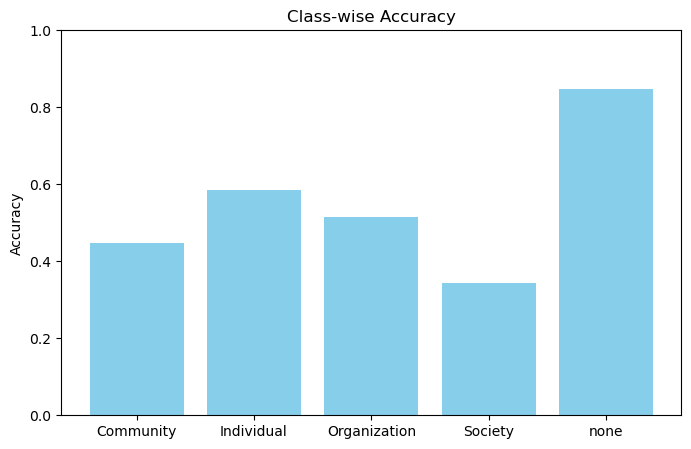

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create bar plot
plt.figure(figsize=(8,5))
plt.bar(classes, class_accuracy, color="skyblue")
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Class-wise Accuracy")
plt.show()

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


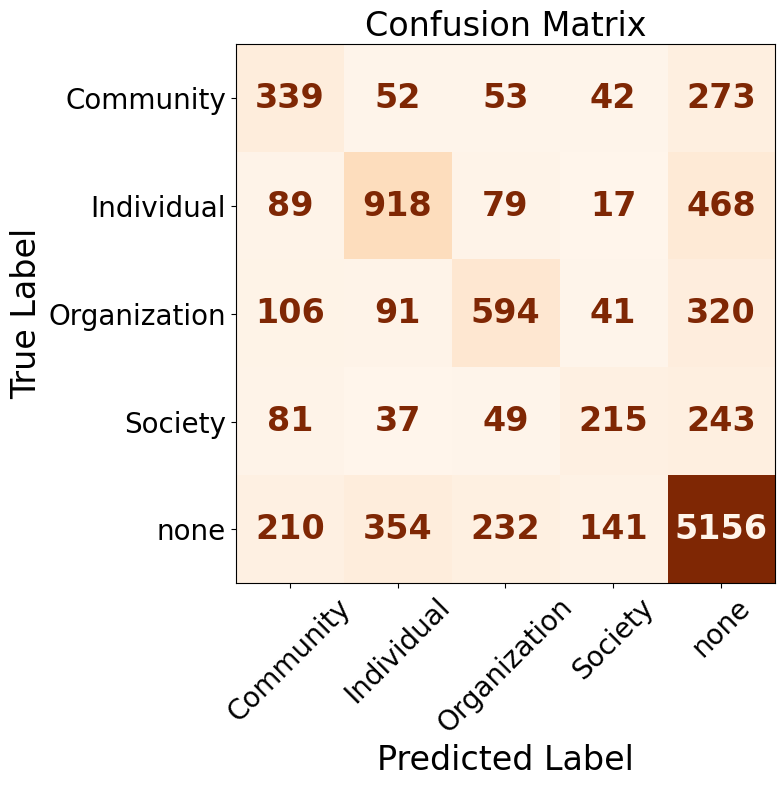

In [312]:
plt.figure(figsize=(25,7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap="Oranges", values_format="d", ax=plt.gca(), colorbar=False)

# Increase number font size inside cells
for text in disp.ax_.texts:
    text.set_fontsize(24)      # increase value font size
    text.set_fontweight("bold")

plt.title("Confusion Matrix", fontsize=24)
plt.xlabel("Predicted Label", fontsize=24)
plt.ylabel("True Label", fontsize=24)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.show()


/tmp/ipykernel_3048770/1059348958.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab = get_cmap("tab10")


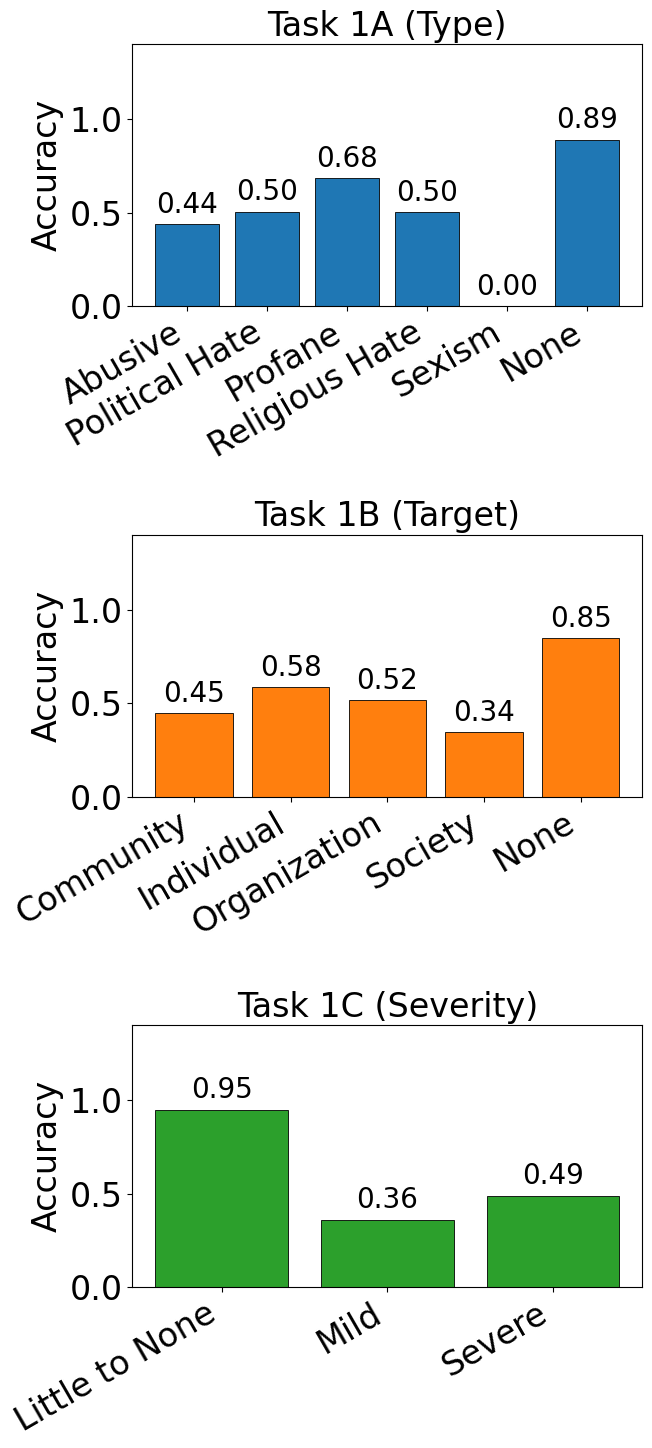

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

# ---------- Data ----------
task1A_classes = ["Abusive","Political Hate","Profane","Religious Hate","Sexism","None"]
task1A_acc     = [0.4381, 0.5049, 0.6841, 0.5028, 0.0000, 0.8885]

task1B_classes = ["Community","Individual","Organization","Society","None"]
task1B_acc     = [0.4466, 0.5843, 0.5156, 0.3440, 0.8462]

task1C_classes = ["Little to None","Mild","Severe"]
task1C_acc     = [0.9458, 0.3588, 0.4891]

# ---------- Global font settings ----------
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"]  = 42
plt.rcParams.update({
    "font.size": 24,
    "axes.titlesize": 24,
    "axes.labelsize": 24,
    "xtick.labelsize": 24,
    "ytick.labelsize": 24,
    "legend.fontsize": 24,
})

# pick three distinct colors for the three tasks
tab = get_cmap("tab10")
task_colors = {
    "Task 1A (Type)":    tab(0),  # blue-ish
    "Task 1B (Target)":  tab(1),  # orange-ish
    "Task 1C (Severity)":tab(2),  # green-ish
}

fig, axes = plt.subplots(3, 1, figsize=(7, 15), sharey=True)

def bar_plot(ax, classes, acc, title, color):
    x = np.arange(len(classes))
    ax.bar(x, acc, color=color, edgecolor="black", linewidth=0.6)
    ax.set_xticks(x)
    ax.set_xticklabels(classes, rotation=30, ha="right")
    ax.set_ylim(0, 1.4)
    ax.set_ylabel("Accuracy")
    ax.set_title(title)
    for i, v in enumerate(acc):
        ax.text(i, min(v + 0.03, 1.35), f"{v:.2f}", ha="center", va="bottom", fontsize=20)

bar_plot(axes[0], task1A_classes, task1A_acc, "Task 1A (Type)",     task_colors["Task 1A (Type)"])
bar_plot(axes[1], task1B_classes, task1B_acc, "Task 1B (Target)",   task_colors["Task 1B (Target)"])
bar_plot(axes[2], task1C_classes, task1C_acc, "Task 1C (Severity)", task_colors["Task 1C (Severity)"])

# optional legend
handles = [plt.Rectangle((0,0),1,1,color=task_colors[k], ec="black") for k in task_colors]
labels  = list(task_colors.keys())
#fig.legend(handles, labels, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.05))

#fig.suptitle("Class-wise Accuracy by Task", y=1.05)
fig.tight_layout()
fig.savefig("classwise_accuracy_all.pdf", bbox_inches="tight")
plt.show()
plt.close(fig)
